In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
 from sklearn.datasets import fetch_california_housing
 from sklearn.preprocessing import StandardScaler
 data = fetch_california_housing()
 data_scaled = StandardScaler().fit_transform(data.data)


In [3]:
# Determine Optimal Number of Clusters using Silhouette Score
silhouette_scores = []
K_range = range(2, 11)

In [4]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, kmeans_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score}")

Silhouette Score for K=2: 0.3308466279566006
Silhouette Score for K=3: 0.31222006634881955
Silhouette Score for K=4: 0.26794176625507843
Silhouette Score for K=5: 0.2567341594160077
Silhouette Score for K=6: 0.27651542553239705
Silhouette Score for K=7: 0.24527937231671224
Silhouette Score for K=8: 0.27816911803211963
Silhouette Score for K=9: 0.2801595056707968
Silhouette Score for K=10: 0.2502523607173459


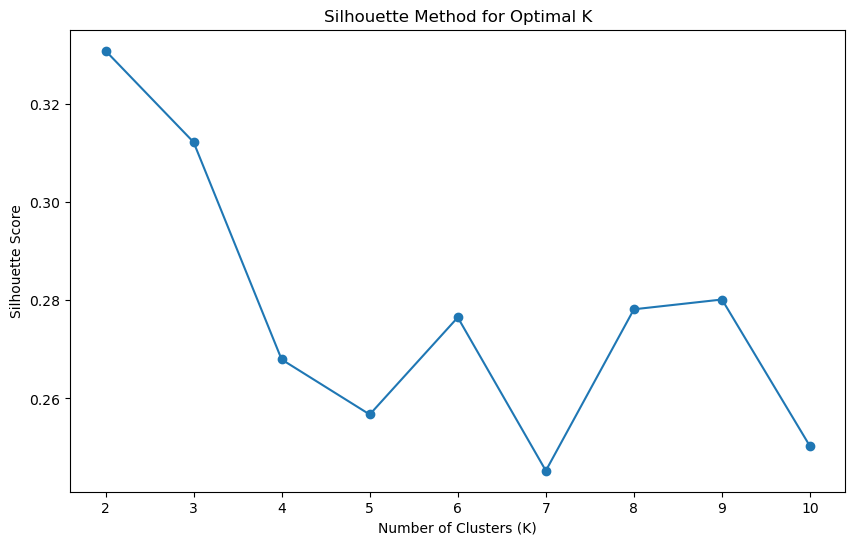

In [5]:
# Plot Silhouette Scores to visualize the best K
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal K")
plt.show()

In [6]:
# Select optimal K (highest silhouette score) and fit KMeans
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters determined by Silhouette Score: K={optimal_k}")


Optimal number of clusters determined by Silhouette Score: K=2


In [7]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_centroids = kmeans.cluster_centers_

In [8]:
# Visualize K-Means Clustering
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

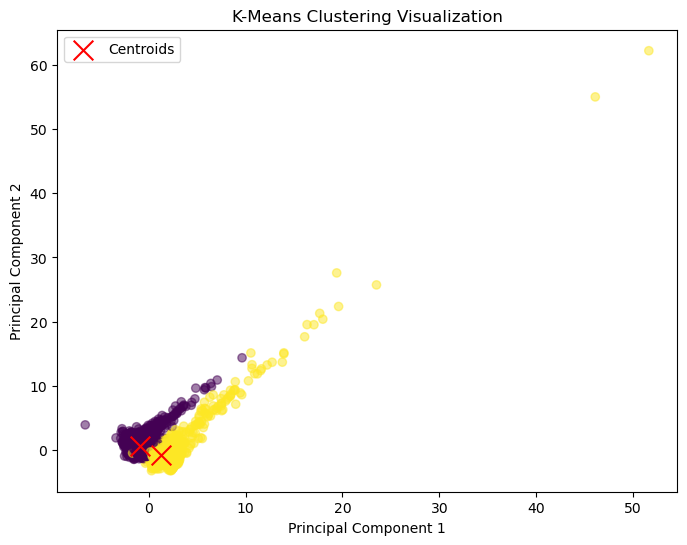

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(pca.transform(kmeans_centroids)[:, 0], pca.transform(kmeans_centroids)[:, 1],
            color='red', marker='x', s=200, label="Centroids")
plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [10]:
# Initialize GMM with KMeans centroids as means
gmm = GaussianMixture(n_components=optimal_k, means_init=kmeans_centroids, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

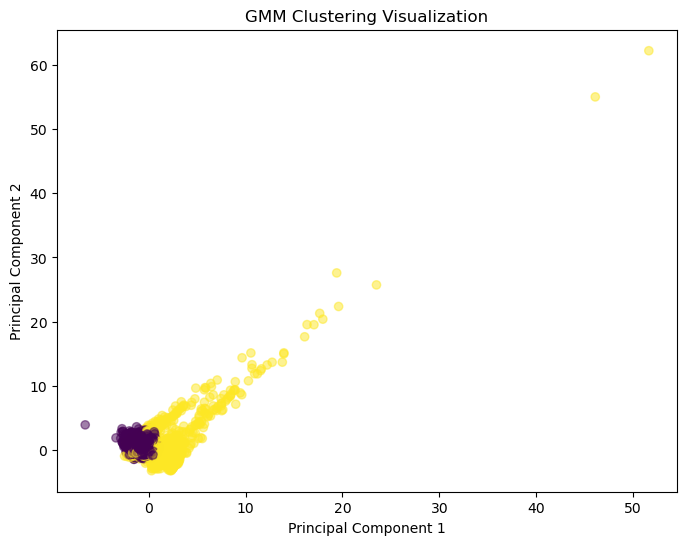

In [11]:
# Visualize GMM Clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title("GMM Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [12]:
# Evaluate GMM with Silhouette Score
gmm_silhouette = silhouette_score(data_scaled, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Explanation of Findings
print("\nFindings:")
print(f"The optimal number of clusters, determined by the Silhouette method, was K={optimal_k}.")
print(f"Silhouette Score for K-Means: {max(silhouette_scores)}")
print(f"Silhouette Score for GMM: {gmm_silhouette}")
print("The K-Means clusters are initialized as centroids for GMM, providing a good starting point for Gaussian distributions.")
print("GMM can model more complex shapes (elliptical clusters) compared to K-Means, which may be why GMM sometimes provides better performance.")

GMM Silhouette Score: 0.31224743599633165

Findings:
The optimal number of clusters, determined by the Silhouette method, was K=2.
Silhouette Score for K-Means: 0.3308466279566006
Silhouette Score for GMM: 0.31224743599633165
The K-Means clusters are initialized as centroids for GMM, providing a good starting point for Gaussian distributions.
GMM can model more complex shapes (elliptical clusters) compared to K-Means, which may be why GMM sometimes provides better performance.


In [13]:
#Assigment4 Task4
    # Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [14]:
# Load and preprocess data (assuming data has been scaled in Part 2)
data = fetch_california_housing().data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [15]:
# Helper function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [16]:
# K-Means from Scratch
class KMeansScratch:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # Initialize centroids randomly from the data points
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iters):
            # Assign clusters
            self.labels = [self._closest_centroid(x) for x in X]
            
            # Calculate new centroids
            new_centroids = np.array([X[np.array(self.labels) == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

        return self.labels

    def _closest_centroid(self, x):
        distances = [euclidean_distance(x, centroid) for centroid in self.centroids]
        return np.argmin(distances)

Silhouette Score for K=2: 0.33085466485216564
Silhouette Score for K=3: 0.2742620223797847
Silhouette Score for K=4: 0.27324735951239576
Silhouette Score for K=5: 0.25817215996925946

Optimal K from scratch: 2


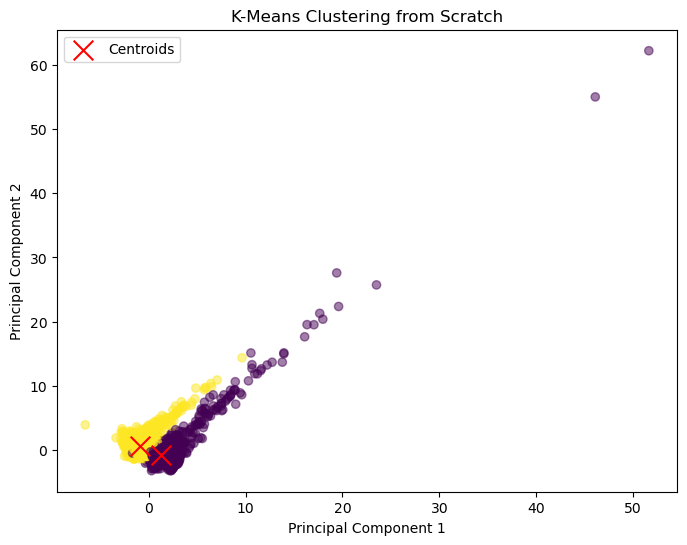

C:\Users\mayur\AppData\Local\Temp\ipykernel_15524\1354329559.py:28: RuntimeWarning: divide by zero encountered in log
  log_likelihood_new = np.sum(np.log(np.sum(self.responsibilities, axis=1)))
C:\Users\mayur\AppData\Local\Temp\ipykernel_15524\1354329559.py:29: RuntimeWarning: invalid value encountered in divide
  self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)
C:\Users\mayur\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


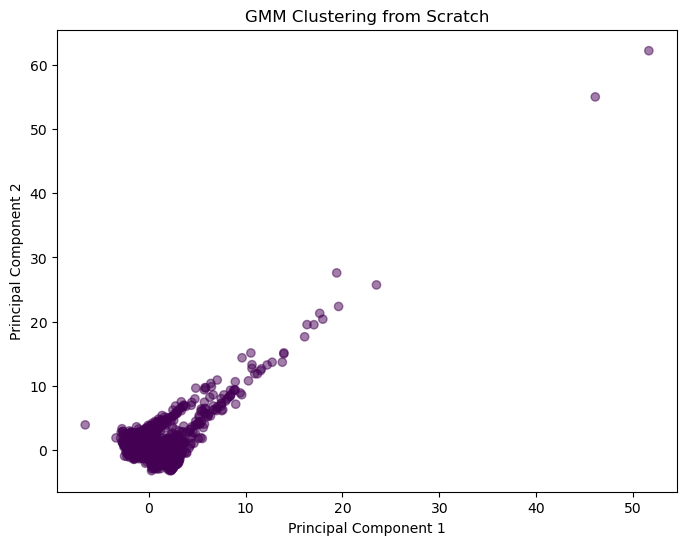

In [17]:
# Gaussian Mixture Model from Scratch
class GMMScratch:
    def __init__(self, n_components, max_iters=100, tol=1e-4):
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol
        self.means = None
        self.covariances = None
        self.weights = None
        self.responsibilities = None

    def fit(self, X):
        np.random.seed(42)
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = [np.cov(X, rowvar=False)] * self.n_components
        self.weights = np.full(self.n_components, 1 / self.n_components)

        log_likelihood = 0
        for _ in range(self.max_iters):
            # Expectation step
            self.responsibilities = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                self.responsibilities[:, k] = self.weights[k] * self._pdf(X, self.means[k], self.covariances[k])

            log_likelihood_new = np.sum(np.log(np.sum(self.responsibilities, axis=1)))
            self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)

            # Check convergence
            if np.abs(log_likelihood_new - log_likelihood) < self.tol:
                break
            log_likelihood = log_likelihood_new

            # Maximization step
            Nk = self.responsibilities.sum(axis=0)
            self.weights = Nk / n_samples
            self.means = np.dot(self.responsibilities.T, X) / Nk[:, np.newaxis]
            self.covariances = [(np.dot((self.responsibilities[:, k][:, np.newaxis] * (X - self.means[k])).T, (X - self.means[k])) / Nk[k]) for k in range(self.n_components)]

        return np.argmax(self.responsibilities, axis=1)

    def _pdf(self, X, mean, cov):
        n_features = X.shape[1]
        det_cov = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), n_features / 2) * np.sqrt(det_cov))
        X_centered = X - mean
        inv_cov = np.linalg.inv(cov)
        return norm_const * np.exp(-0.5 * np.sum(X_centered @ inv_cov * X_centered, axis=1))

# Determine Optimal Number of Clusters with Silhouette Score for K-Means
silhouette_scores = []
K_range = range(2, 6)  # Limit for simplicity

for k in K_range:
    kmeans_scratch = KMeansScratch(n_clusters=k)
    labels = kmeans_scratch.fit(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score}")

# Optimal K from Silhouette Score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K from scratch: {optimal_k}")

# Apply K-Means from Scratch with optimal K
kmeans_scratch = KMeansScratch(n_clusters=optimal_k)
kmeans_labels = kmeans_scratch.fit(data_scaled)
kmeans_centroids = kmeans_scratch.centroids

# Visualize K-Means Clustering Results
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(pca.transform(kmeans_centroids)[:, 0], pca.transform(kmeans_centroids)[:, 1],
            color='red', marker='x', s=200, label="Centroids")
plt.title("K-Means Clustering from Scratch")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Apply GMM from Scratch with optimal K
gmm_scratch = GMMScratch(n_components=optimal_k)
gmm_labels = gmm_scratch.fit(data_scaled)

# Visualize GMM Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title("GMM Clustering from Scratch")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [18]:
# Assuming data_scaled and the optimal_k have been defined from previous tasks in the notebook

# Step 1: Evaluate K-Means (from scratch) using Silhouette Score
kmeans_scratch = KMeansScratch(n_clusters=optimal_k)
kmeans_labels = kmeans_scratch.fit(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Step 2: Evaluate GMM (from scratch) using Silhouette Score
gmm_scratch = GMMScratch(n_components=optimal_k)
gmm_labels = gmm_scratch.fit(data_scaled)
gmm_silhouette = silhouette_score(data_scaled, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Step 3: Visualize Clusters with PCA for 2D Plotting
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(pca.transform(kmeans_scratch.centroids)[:, 0], pca.transform(kmeans_scratch.centroids)[:, 1],
            color='red', marker='x', s=100, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# Plot GMM Clusters
plt.subplot(1, 2, 2)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title("GMM Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

# Step 4: Discussion of Results
print("\nEvaluation and Comparison:")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")
print("A higher Silhouette score indicates better-defined clusters.")
print("K-Means generally works well with spherical clusters, while GMM can model more complex cluster shapes.")
print("The visualizations and Silhouette scores together suggest which algorithm may be better suited to the dataset's structure.")


K-Means Silhouette Score: 0.33085466485216564


C:\Users\mayur\AppData\Local\Temp\ipykernel_15524\1354329559.py:28: RuntimeWarning: divide by zero encountered in log
  log_likelihood_new = np.sum(np.log(np.sum(self.responsibilities, axis=1)))
C:\Users\mayur\AppData\Local\Temp\ipykernel_15524\1354329559.py:29: RuntimeWarning: invalid value encountered in divide
  self.responsibilities /= self.responsibilities.sum(axis=1, keepdims=True)
C:\Users\mayur\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce data dimensions for visualization using PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

# Step 2: Visualize K-Means Clusters
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Principal Component 2')

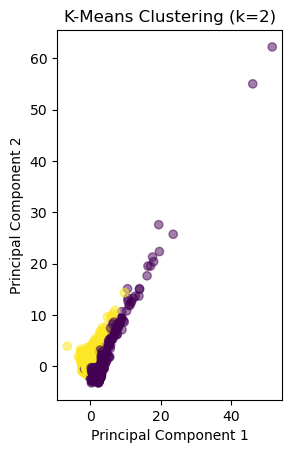

In [21]:
# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

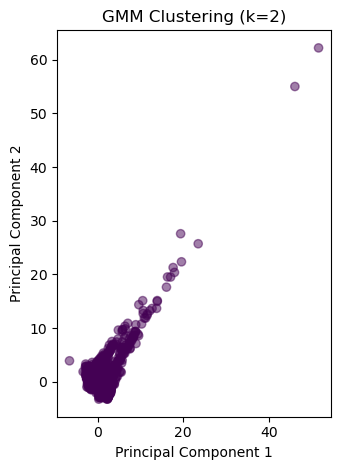

In [23]:
# Step 3: Visualize GMM Clusters
plt.subplot(1, 2, 2)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=gmm_labels, cmap='viridis', alpha=0.5)
plt.title(f"GMM Clustering (k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# In this analysis, we compared K-Means and Gaussian Mixture Model (GMM) clustering methods on our dataset, highlighting their strengths and weaknesses. 
# K-Means is faster, simpler, and effective for well-separated, spherical clusters, making it ideal for quick clustering with large datasets. 
# However, it struggles with complex, overlapping, or variably shaped clusters and is sensitive to initialization. GMM, on the other hand, provides flexibility with elliptical or overlapping clusters by modeling data as a mixture of Gaussians, enabling "soft" clustering where each point has a probability of belonging to each cluster. This makes it suitable for datasets with non-spherical clusters but comes at the cost of being computationally intensive and prone to overfitting, especially with a high number of clusters.

#Overall, for simple, distinct clusters, K-Means is an efficient choice, while GMM performs better with complex structures but requires careful tuning to avoid overfitting. By visualizing clusters and evaluating Silhouette scores, we can select the algorithm best suited to the data's characteristics, with GMM offering nuanced insights for more complex datasets and K-Means providing quick, interpretable results for straightforward cases.